In [1]:
import os
import matplotlib.pyplot as plt
from skimage import io, img_as_ubyte
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray, rgba2rgb
from skimage.measure import label, regionprops
from skimage.transform import resize, rotate

In [2]:
filepath = 'imgs/mask.jpeg'
im = io.imread(filepath)
mask = im > threshold_otsu(im)
io.imshow(img_as_ubyte(mask))

FileNotFoundError: No such file: '/Users/pboonebenchsci.com/repos/boonepeter.github.io-code/snapcodes/src/imgs/mask.jpeg'

In [3]:
def get_points(filepath):
    im = io.imread(filepath)
    im = rgb2gray(rgba2rgb(im))
    t = threshold_otsu(im)
    return im > t


    
def get_points_2(image):
    if image.shape[2] == 4:
        image = rgba2rgb(image)
    im = rgb2gray(image)
    t = threshold_otsu(im)
    return im > t

In [4]:
p = get_points("imgs/codes/snapcode.png")

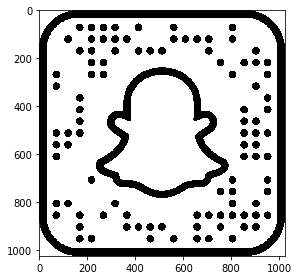

In [5]:
io.imshow(img_as_ubyte(p))

In [6]:
l = label(p, background=1)

/usr/local/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


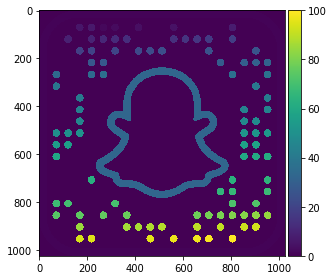

In [7]:
io.imshow(l)

In [8]:
rp = regionprops(l)

In [9]:
def process_and_plot(filepath):
    p = get_points(filepath)
    l = label(p, background=1)
    rp = regionprops(l)
    fig, ax = plt.subplots()
    ax.imshow(l, cmap=plt.cm.gray)
    minx, miny, (maxx, maxy) = 0, 0, l.shape
    max_size = l.shape[0] * l.shape[1] // 500
    for props in rp[:10]:
        y0, x0 = props.centroid
        minr, minc, maxr, maxc = props.bbox
        bx = (minc, maxc, maxc, minc, minc)
        by = (minr, minr, maxr, maxr, minr)
        if props.bbox_area < max_size:
            print(((minr / maxy) + (maxr / maxy)) / 2)
            print(((minc / maxx) + (maxc / maxx)) / 2)
            ax.plot(bx, by, '-b', linewidth=2.5)
    print(minx, miny, maxx, maxy)
    ax.axis()
    plt.show()

In [10]:
def get_bb(filepath):
    p = get_points(filepath)
    l = label(p, background=1)
    rp = regionprops(l)
    fig, ax = plt.subplots()
    ax.imshow(l, cmap=plt.cm.gray)
    minx, miny, (maxx, maxy) = 0, 0, l.shape
    max_size = l.shape[0] * l.shape[1] // 500
    bbs = []
    centers = []
    for props in rp:
        y0, x0 = props.centroid
        minr, minc, maxr, maxc = props.bbox
        bx = (minc, maxc, maxc, minc, minc)
        by = (minr, minr, maxr, maxr, minr)
        if props.bbox_area < max_size:
            bbs.append((props.bbox[0] / maxx, props.bbox[1] / maxx, props.bbox[2] / maxx, props.bbox[3] / maxx))
            centers.append(
                (
                    (((minr / maxy) + (maxr / maxy)) / 2), 
                    (((minc / maxx) + (maxc / maxx)) / 2)
                ),
            )
            ax.plot(bx, by, '-b', linewidth=2.5)
    ax.axis()
    plt.show()
    return bbs, centers

0.0703125
0.26171875
0.0703125
0.3095703125
0.0703125
0.404296875
0.0703125
0.5478515625
0.07080078125
0.166015625
0.07080078125
0.2138671875
0.07080078125
0.7861328125
0.1181640625
0.1181640625
0.1181640625
0.2138671875
0 0 1024 1024


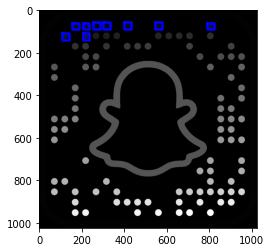

In [11]:
process_and_plot("imgs/codes/snapcode.png")

In [12]:
process_and_plot("imgs/all_dots.png")

FileNotFoundError: No such file: '/Users/pboonebenchsci.com/repos/boonepeter.github.io-code/snapcodes/src/imgs/all_dots.png'

In [13]:
points = [
    [0 for i in range(17)],
    [0 for i in range(19)],
    [0 for i in range(19)],
    [0 for i in range(12)],
    [0 for i in range(10)],
    [0 for i in range(8)], 
    [0 for i in range(6)],
    [0 for i in range(6)],
    [0 for i in range(6)],
    [0 for i in range(6)],
    [0 for i in range(6)],
    [0 for i in range(6)],
    [0 for i in range(6)],
    [0 for i in range(8)], 
    [0 for i in range(10)],
    [0 for i in range(12)],
    [0 for i in range(19)],
    [0 for i in range(19)],
    [0 for i in range(17)],    
]
total = 0
for i in points:
    for j in i:
        total += 1
print(total)

212


In [14]:
bbs, centers = get_bb("imgs/all_dots.png")

FileNotFoundError: No such file: '/Users/pboonebenchsci.com/repos/boonepeter.github.io-code/snapcodes/src/imgs/all_dots.png'

In [15]:
total = []
for i in points:
    total.extend(i)

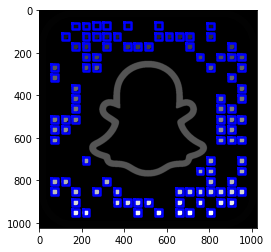

In [16]:
small_bbs, small_centers = get_bb("imgs/codes/snapcode.png")

In [17]:
print(bbs[:10])

NameError: name 'bbs' is not defined

In [18]:
def get_numbers(centers, bbs):
    points = []
    for i, b in enumerate(bbs):
        for x, y in centers:
            if x > b[0] and x < b[2] and y > b[1] and y < b[3]:
                points.append(i)
    return points

In [19]:
files = [
    os.path.join("imgs/codes", f) 
    for f in os.listdir("imgs/codes") 
    if f.endswith("png")
]

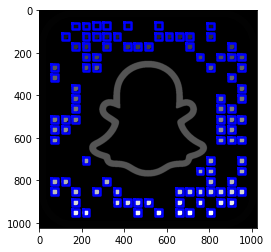

NameError: name 'bbs' is not defined

In [20]:
counts = {i:0 for i in range(212)}
for f in files:
    _, centers = get_bb(f)
    nums = get_numbers(centers, bbs)
    for n in nums:
        counts[n] += 1
print(counts)

In [ ]:
image = io.imread("./imgs/codes/snapcode.png")
print(image[700][30:-50])


In [21]:
binary = image[:,:,0] > 250
binary &= image[:,:,1] > 250
binary &= image[:,:,2] < 5


l = label(binary, background=0)
rp = regionprops(l)
bbox = rp[0].bbox
print(rp)
print(bbox)
binary = binary[bbox[0]:bbox[2], bbox[1]:bbox[3]]


NameError: name 'image' is not defined

In [22]:
def threshold_and_crop(filepath, color=[250, 250, 5]):
    im = io.imread(filepath)
    binary = im[:,:,0] > color[0]
    binary &= im[:,:,1] > color[1]
    binary &= im[:,:,2] < color[2]
    #io.imshow(img_as_ubyte(binary))
    labeled = label(binary, background=0)
    rp = regionprops(labeled)
    max_size = 0
    bbox = None
    for r in rp:
        if r.bbox_area > max_size:
            bbox = r.bbox
            max_size = r.bbox_area
    return im[bbox[0]:bbox[2], bbox[1]:bbox[3], :]



In [23]:
threshold_and_crop("./imgs/codes/snapcode.png")

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [24]:
threshold_and_crop("imgs/new/29939adc9b4ffa549817d3c2eb3fc04b (1).png")

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [25]:
files = os.listdir("imgs/people")
files = [os.path.join("imgs/people", f) for f in files if f.endswith(".jpeg")]

In [26]:
print(files[9])
threshold_and_crop(files[9])


imgs/people/FECYsfjXwAIEYmJ.jpeg


TypeError: 'NoneType' object is not subscriptable

In [27]:
def get_bb_2(filepath):
    im = threshold_and_crop(filepath)
    p = get_points_2(im)
    l = label(p, background=1)
    rp = regionprops(l)
    #fig, ax = plt.subplots()
    #ax.imshow(l, cmap=plt.cm.gray)
    minx, miny, (maxx, maxy) = 0, 0, l.shape
    max_size = l.shape[0] * l.shape[1] // 500
    min_size = l.shape[0] * l.shape[1] // 2000

    bbs = []
    centers = []
    for props in rp:
        y0, x0 = props.centroid
        minr, minc, maxr, maxc = props.bbox
        bx = (minc, maxc, maxc, minc, minc)
        by = (minr, minr, maxr, maxr, minr)
        if props.bbox_area < max_size and props.bbox_area > min_size:
            bbs.append((props.bbox[0] / maxx, props.bbox[1] / maxx, props.bbox[2] / maxx, props.bbox[3] / maxx))
            centers.append(
                (
                    (((minr / maxy) + (maxr / maxy)) / 2), 
                    (((minc / maxx) + (maxc / maxx)) / 2)
                ),
            )
    #        ax.plot(bx, by, '-b', linewidth=2.5)
    #ax.axis()
    #plt.show()
    return bbs, centers

In [28]:
n = [os.path.join("imgs/new", f) for f in os.listdir('imgs/new') if f.endswith('.png')]

In [29]:
files += n

In [31]:
all_bb, _ = get_bb_2("generated/all_dots_yellow.png")

for f in files:
    try:
        _, centers = get_bb_2(f)
        nums = get_numbers(centers, all_bb)
        print(nums)
    except:
        print(f)

[1, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 18, 19, 20, 21, 23, 25, 28, 31, 32, 33, 34, 38, 39, 42, 43, 46, 47, 48, 50, 51, 54, 57, 58, 64, 65, 67, 68, 70, 71, 74, 77, 82, 83, 90, 91, 93, 94, 96, 108, 111, 113, 115, 117, 124, 125, 127, 130, 132, 136, 139, 141, 143, 147, 148, 150, 151, 153, 154, 156, 159, 160, 162, 163, 164, 165, 166, 167, 168, 169, 173, 177, 179, 181, 182, 185, 186, 187, 188, 192, 193, 196, 199, 201, 202, 204, 205, 210]
[1, 2, 3, 5, 6, 7, 8, 12, 14, 18, 20, 21, 23, 24, 25, 26, 29, 34, 38, 39, 41, 42, 45, 47, 48, 55, 58, 61, 64, 68, 72, 75, 82, 83, 91, 93, 94, 98, 100, 101, 105, 115, 119, 122, 124, 125, 129, 131, 132, 133, 136, 138, 141, 142, 147, 151, 152, 154, 157, 158, 159, 161, 164, 165, 166, 168, 171, 174, 179, 181, 184, 185, 189, 193, 196, 197, 199, 200, 202, 203, 204, 205, 206, 208, 209, 210]
[2, 4, 5, 8, 10, 13, 14, 15, 18, 19, 22, 23, 24, 30, 32, 38, 40, 41, 42, 44, 48, 49, 51, 55, 56, 57, 58, 60, 63, 64, 66, 68, 72, 75, 76, 77, 79, 80, 82, 83, 90, 91, 93, 94, 96,

[1, 3, 5, 9, 10, 12, 13, 15, 18, 19, 20, 21, 23, 24, 29, 30, 32, 33, 34, 38, 39, 41, 43, 46, 49, 50, 51, 52, 54, 56, 57, 58, 61, 62, 63, 64, 66, 67, 69, 70, 72, 73, 76, 78, 81, 82, 87, 90, 93, 94, 96, 97, 100, 101, 102, 108, 110, 111, 113, 115, 118, 119, 121, 126, 127, 129, 138, 139, 140, 146, 150, 152, 153, 155, 157, 158, 159, 160, 161, 162, 163, 164, 165, 169, 170, 171, 173, 175, 177, 178, 179, 181, 183, 184, 186, 187, 190, 192, 193, 196, 200, 201, 202, 204, 206]
[3, 4, 7, 8, 9, 10, 13, 15, 18, 19, 20, 22, 23, 27, 28, 29, 34, 38, 39, 41, 42, 44, 45, 49, 50, 51, 54, 55, 56, 57, 59, 62, 65, 68, 69, 70, 72, 73, 75, 77, 78, 79, 80, 82, 83, 87, 90, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 105, 108, 109, 112, 114, 118, 121, 128, 129, 131, 134, 135, 136, 137, 139, 141, 144, 147, 148, 150, 151, 152, 154, 155, 157, 159, 161, 162, 164, 166, 170, 171, 172, 173, 177, 178, 180, 182, 186, 187, 190, 191, 196, 198, 200, 201, 203, 205, 206, 209, 210]
[1, 2, 4, 6, 7, 8, 9, 11, 12, 14, 18, 19, 21, 2

In [32]:
folders = [os.path.join('imgs', f) for f in os.listdir('imgs') if f != '.DS_Store']

In [33]:
files = []
for f in folders:
    files += [os.path.join(f, i) for i in os.listdir(f) if i.endswith(".png") or i.endswith(".jpeg")]

In [34]:
all_bb, _ = get_bb_2("generated/all_dots_yellow.png")

for f in files:
    try:
        _, centers = get_bb_2(f)
        nums = get_numbers(centers, all_bb)
        print(nums)
    except:
        print(f)

[6, 8, 9, 12, 13, 14, 15, 18, 19, 20, 22, 23, 24, 27, 32, 34, 38, 39, 41, 42, 47, 48, 52, 53, 55, 57, 60, 64, 66, 71, 72, 73, 74, 78, 80, 90, 91, 93, 94, 96, 97, 98, 99, 101, 105, 108, 110, 112, 117, 118, 119, 123, 125, 126, 127, 129, 131, 132, 139, 142, 143, 144, 145, 147, 148, 149, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 169, 171, 172, 173, 174, 175, 179, 185, 187, 188, 189, 191, 192, 193, 196, 200, 201, 204, 205, 209]
[]
[]
imgs/twitter/FA4iYT9VEAc6bJg.jpeg
[3, 5, 7, 10, 11, 14, 15, 18, 19, 21, 22, 25, 26, 32, 33, 34, 38, 39, 41, 44, 45, 46, 53, 56, 57, 63, 64, 65, 66, 69, 70, 72, 74, 76, 77, 78, 80, 83, 90, 91, 93, 94, 96, 98, 100, 104, 105, 108, 111, 114, 115, 116, 118, 122, 127, 129, 130, 131, 134, 135, 139, 140, 141, 142, 146, 147, 149, 152, 153, 154, 156, 158, 160, 161, 162, 163, 164, 165, 167, 170, 171, 174, 180, 181, 182, 184, 186, 187, 188, 189, 190, 192, 193, 196, 198, 199, 200, 203, 205]
[3, 4, 6, 7, 8, 11, 12, 13, 15, 18, 19, 21, 23, 25, 28, 

[2, 3, 6, 8, 9, 12, 18, 19, 22, 26, 27, 28, 29, 30, 31, 33, 34, 38, 43, 44, 47, 49, 53, 56, 58, 60, 65, 66, 67, 68, 69, 72, 74, 75, 76, 78, 80, 81, 82, 83, 84, 90, 91, 93, 94, 96, 98, 100, 103, 105, 111, 112, 116, 117, 118, 119, 123, 125, 132, 133, 135, 140, 143, 147, 148, 149, 151, 152, 154, 156, 159, 161, 165, 167, 170, 175, 179, 181, 183, 184, 185, 186, 188, 190, 193, 196, 198, 199, 203, 207, 208, 210]
[1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 15, 18, 20, 21, 22, 28, 29, 30, 32, 34, 38, 40, 41, 43, 44, 45, 49, 50, 54, 56, 62, 64, 66, 67, 68, 70, 72, 73, 74, 75, 78, 80, 81, 83, 90, 91, 93, 94, 96, 97, 98, 99, 103, 104, 105, 110, 111, 113, 115, 117, 120, 121, 122, 124, 126, 127, 130, 133, 135, 139, 142, 143, 144, 146, 147, 148, 150, 152, 153, 159, 160, 165, 166, 168, 170, 172, 173, 174, 177, 179, 181, 182, 183, 184, 185, 187, 188, 190, 192, 193, 196, 197, 199, 201, 204, 205]
imgs/twitter/FA5bEZlXMAA5G26.jpeg
[2, 3, 5, 6, 7, 9, 10, 13, 18, 20, 23, 24, 28, 30, 33, 38, 40, 41, 42, 43, 49, 51

[2, 3, 5, 8, 9, 10, 13, 18, 19, 21, 22, 23, 25, 27, 28, 31, 38, 40, 42, 43, 45, 46, 48, 49, 50, 53, 57, 58, 62, 65, 66, 67, 69, 70, 71, 76, 78, 79, 81, 90, 91, 93, 94, 96, 97, 101, 102, 104, 105, 112, 115, 116, 118, 121, 122, 124, 129, 134, 135, 142, 143, 144, 147, 150, 151, 153, 154, 157, 159, 161, 162, 165, 166, 167, 169, 172, 173, 174, 177, 179, 181, 182, 185, 187, 189, 190, 192, 193, 197, 201, 202, 203, 204, 206, 207, 209, 210]
[3, 4, 5, 6, 8, 10, 11, 14, 18, 19, 21, 22, 23, 25, 28, 30, 31, 38, 39, 40, 41, 42, 45, 46, 47, 50, 52, 54, 56, 58, 65, 66, 67, 68, 69, 70, 71, 72, 73, 82, 84, 90, 91, 93, 94, 96, 98, 99, 102, 104, 113, 116, 118, 119, 120, 123, 125, 127, 129, 130, 131, 132, 133, 136, 138, 139, 141, 142, 144, 147, 154, 155, 160, 164, 168, 169, 171, 173, 177, 179, 187, 188, 190, 193, 196, 198, 200, 202, 204, 206, 207, 208, 209, 210]
imgs/twitter/FA4WkUVWUAcer0X.jpeg
imgs/twitter/FA4330WXMAgRXOw.jpeg
[]
[1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 18, 20, 21, 22, 23, 24, 25, 29, 30, 32, 33

[3, 4, 8, 21, 31, 36, 40, 41, 67, 115, 127, 139, 149, 150, 156]
[1, 2, 4, 8, 9, 10, 13, 15, 18, 23, 24, 28, 29, 33, 38, 39, 40, 41, 42, 44, 46, 47, 48, 50, 51, 52, 54, 55, 56, 57, 58, 61, 62, 63, 64, 65, 66, 67, 68, 71, 72, 73, 74, 76, 77, 78, 82, 84, 90, 91, 93, 94, 96, 99, 101, 102, 103, 104, 105, 110, 111, 115, 116, 117, 120, 124, 125, 126, 127, 129, 135, 140, 142, 143, 146, 147, 149, 152, 153, 154, 156, 157, 158, 164, 165, 166, 169, 170, 171, 172, 174, 179, 182, 183, 188, 193, 196, 206, 208]
[1, 2, 3, 4, 6, 8, 11, 18, 21, 23, 24, 30, 31, 34, 38, 39, 41, 44, 45, 47, 48, 49, 50, 53, 54, 59, 60, 61, 64, 67, 69, 72, 76, 77, 78, 79, 81, 82, 83, 84, 90, 91, 93, 94, 96, 97, 101, 102, 103, 104, 105, 111, 117, 118, 119, 121, 125, 127, 129, 134, 135, 138, 139, 141, 142, 143, 147, 151, 153, 154, 156, 160, 161, 162, 163, 164, 168, 170, 172, 173, 177, 181, 182, 183, 184, 186, 187, 188, 190, 193, 196, 197, 198, 199, 200, 201, 202, 203, 204, 210]
[2, 4, 5, 7, 8, 9, 10, 11, 15, 18, 19, 21, 22, 28,

[1, 3, 7, 9, 11, 13, 14, 15, 18, 20, 21, 23, 24, 25, 28, 29, 30, 32, 33, 34, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 57, 59, 61, 64, 65, 66, 68, 69, 72, 77, 80, 81, 82, 90, 91, 93, 94, 96, 97, 98, 99, 100, 105, 108, 110, 112, 116, 122, 123, 126, 127, 135, 143, 147, 148, 152, 154, 156, 161, 162, 163, 164, 166, 167, 168, 170, 172, 175, 181, 183, 184, 185, 187, 191, 193, 196, 197, 198, 199, 200, 204, 205, 207, 210]
[1, 2, 3, 6, 8, 9, 10, 11, 13, 15, 18, 19, 22, 23, 24, 30, 31, 32, 34, 38, 39, 40, 45, 46, 47, 48, 49, 51, 53, 54, 56, 59, 61, 62, 66, 68, 69, 70, 72, 73, 74, 80, 82, 83, 84, 90, 91, 93, 94, 96, 97, 98, 102, 104, 112, 113, 117, 118, 119, 120, 121, 125, 127, 129, 130, 131, 134, 136, 137, 140, 141, 148, 154, 155, 157, 159, 160, 164, 165, 166, 167, 168, 169, 171, 177, 185, 186, 188, 191, 193, 198, 200, 201, 202, 204, 206, 208, 210]
[4, 8, 9, 59, 60, 67, 104, 151, 204, 206]
[1, 2, 5, 7, 9, 10, 12, 14, 15, 18, 20, 21, 22, 25, 28, 33, 38, 39, 40, 42, 44, 46, 5

[1, 2, 8, 11, 13, 14, 18, 20, 21, 23, 24, 25, 26, 27, 28, 29, 32, 33, 38, 40, 41, 42, 45, 48, 50, 56, 57, 58, 59, 61, 67, 69, 72, 73, 74, 75, 77, 80, 81, 82, 90, 91, 93, 94, 96, 98, 99, 101, 106, 111, 113, 114, 115, 121, 123, 124, 126, 127, 129, 130, 139, 141, 142, 143, 144, 147, 148, 150, 156, 157, 159, 162, 163, 169, 170, 172, 173, 174, 175, 177, 179, 180, 182, 183, 184, 185, 187, 188, 190, 192, 197, 198, 201, 203, 204, 206, 207, 208, 209, 210]
[1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 15, 18, 19, 20, 22, 25, 27, 29, 32, 38, 40, 41, 46, 47, 50, 52, 53, 56, 57, 61, 64, 66, 69, 71, 72, 75, 76, 77, 79, 80, 81, 83, 90, 91, 93, 94, 96, 97, 99, 101, 104, 105, 108, 110, 115, 117, 119, 121, 123, 124, 125, 126, 127, 129, 133, 135, 138, 141, 142, 143, 144, 147, 149, 150, 154, 157, 159, 161, 165, 167, 168, 169, 170, 171, 177, 179, 181, 183, 185, 186, 187, 190, 192, 197, 198, 199, 200, 202, 206, 207, 209, 210]
[1, 2, 3, 6, 9, 11, 12, 13, 14, 15, 18, 20, 22, 26, 27, 30, 32, 34, 38, 41, 43, 44, 45, 48

[1, 3, 5, 6, 7, 8, 9, 11, 12, 15, 18, 21, 24, 25, 26, 29, 31, 33, 38, 39, 41, 42, 43, 44, 45, 48, 49, 50, 51, 52, 55, 58, 61, 63, 64, 66, 67, 71, 72, 73, 75, 76, 77, 78, 79, 84, 87, 90, 93, 94, 96, 98, 100, 101, 103, 107, 113, 114, 115, 116, 118, 121, 123, 125, 126, 127, 128, 129, 131, 132, 135, 137, 138, 139, 140, 141, 144, 147, 148, 151, 152, 154, 155, 157, 158, 159, 161, 164, 166, 169, 170, 173, 174, 178, 179, 181, 182, 184, 187, 188, 192, 193, 202, 205, 208, 209, 210]
[1, 2, 3, 11, 15, 18, 19, 20, 22, 24, 27, 31, 33, 34, 38, 39, 43, 44, 46, 47, 56, 57, 58, 59, 61, 63, 66, 68, 70, 71, 74, 75, 76, 84, 87, 90, 93, 94, 96, 98, 104, 105, 106, 107, 108, 109, 110, 111, 115, 116, 118, 120, 121, 124, 125, 126, 129, 130, 131, 135, 137, 138, 139, 140, 141, 144, 145, 146, 147, 151, 152, 153, 155, 157, 159, 163, 166, 169, 175, 180, 181, 183, 184, 185, 187, 188, 189, 190, 192, 193, 196, 198, 199, 202, 203, 204, 205, 206, 207, 208, 209]
[1, 3, 4, 7, 9, 10, 12, 13, 15, 18, 20, 21, 23, 25, 26, 28, 

[]
[]
[1, 4, 5, 6, 8, 9, 13, 18, 20, 21, 23, 25, 26, 29, 31, 38, 40, 42, 47, 48, 49, 55, 56, 58, 61, 67, 68, 69, 71, 72, 77, 78, 80, 91, 93, 98, 99, 104, 105, 111, 122, 123, 130, 136, 138, 139, 147, 149, 159, 162, 165, 167, 169, 170, 181, 183, 188, 189, 196, 197, 198, 199, 200, 203, 204, 205, 207]
[1, 2, 3, 4, 6, 9, 14, 18, 20, 21, 22, 23, 27, 28, 29, 30, 32, 38, 39, 41, 43, 44, 45, 49, 53, 58, 59, 62, 64, 65, 66, 67, 70, 71, 73, 76, 77, 83, 87, 90, 93, 94, 96, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 115, 118, 119, 120, 130, 131, 134, 140, 141, 144, 145, 146, 150, 153, 155, 157, 159, 161, 163, 169, 170, 171, 172, 173, 174, 175, 178, 182, 183, 184, 185, 188, 190, 192, 193, 196, 197, 202, 204, 206, 207, 209]
[2, 4, 7, 8, 9, 11, 14, 18, 19, 20, 21, 22, 23, 26, 30, 38, 39, 43, 50, 52, 55, 59, 60, 61, 68, 69, 70, 71, 72, 74, 77, 79, 81, 83, 87, 90, 93, 94, 96, 97, 99, 102, 105, 107, 109, 111, 112, 113, 114, 116, 117, 118, 123, 124, 129, 130, 131, 132, 133, 134, 136, 

In [35]:
counts = {i:0 for i in range(212)}
for f in files:
    try:
        _, centers = get_bb_2(f)
        nums = get_numbers(centers, all_bb)
        for n in nums:
            counts[n] += 1
    except:
        print(f)
print(counts)

imgs/twitter/FA4iYT9VEAc6bJg.jpeg
imgs/twitter/FA4SmddX0A4unCW.jpeg
imgs/twitter/FIkqnScXMAEsQeq.jpeg
imgs/twitter/FA4qFzKWYAc35dw.jpeg
imgs/twitter/FIotM6hWQAURLqG.jpeg
imgs/twitter/FIzI7g2VQAA_R9d.jpeg
imgs/twitter/FA6ijkxUUAARLJ_.jpeg
imgs/twitter/FA5bEZlXMAA5G26.jpeg
imgs/twitter/FA4cRa-XMAkfx6B.jpeg
imgs/twitter/FA4Xqy-XEAYSGH1.jpeg
imgs/twitter/FA4PFdkWYBIuKRg.jpeg
imgs/twitter/FA4NgUfXIA80TGx.jpeg
imgs/twitter/FA4gaIcWUAMmySl.jpeg
imgs/twitter/FA4z6EDXEAErNes.jpeg
imgs/twitter/FA7ZyaNXIAMzXqs.jpeg
imgs/twitter/FA4WkUVWUAcer0X.jpeg
imgs/twitter/FA4330WXMAgRXOw.jpeg
imgs/twitter/FA4OYJWWUBICFMU.jpeg
imgs/twitter/FA4YGyUWUAEIMf2.jpeg
imgs/twitter/FA4ZjmkWYAolRnZ.jpeg
imgs/twitter/FA4cFAqX0AkLZjl.jpeg
imgs/twitter/FA4cMaHWEAQ9371.jpeg
imgs/twitter/FA6czUfXIAIe2jv.jpeg
imgs/twitter/FA4wPOzWQAIcXdW.jpeg
imgs/twitter/FA4X8oTWEAILtqS.jpeg
imgs/twitter/FA4Nkg2X0AEVeAF.jpeg
imgs/twitter/FA6b0i1WQAEVRvZ.jpeg
imgs/twitter/FA4QOZVWUBA-Tdp.jpeg
imgs/twitter/FA4h9VBX0BA9H-Z.jpeg
imgs/twitter/F

In [36]:
d = {0: 0, 1: 38, 2: 42, 3: 47, 4: 45, 5: 41, 6: 28, 7: 35, 8: 32, 9: 41, 10: 38, 11: 35, 12: 41, 13: 38, 14: 37, 15: 35, 16: 1, 17: 0, 18: 76, 19: 37, 20: 47, 21: 44, 22: 41, 23: 43, 24: 29, 25: 43, 26: 40, 27: 38, 28: 34, 29: 49, 30: 34, 31: 30, 32: 44, 33: 38, 34: 37, 35: 0, 36: 0, 37: 0, 38: 76, 39: 61, 40: 19, 41: 41, 42: 44, 43: 46, 44: 47, 45: 35, 46: 34, 47: 32, 48: 37, 49: 37, 50: 37, 51: 36, 52: 35, 53: 32, 54: 35, 55: 40, 56: 43, 57: 42, 58: 48, 59: 27, 60: 28, 61: 49, 62: 31, 63: 24, 64: 34, 65: 36, 66: 35, 67: 31, 68: 46, 69: 41, 70: 36, 71: 36, 72: 49, 73: 35, 74: 36, 75: 36, 76: 35, 77: 37, 78: 36, 79: 48, 80: 28, 81: 28, 82: 31, 83: 38, 84: 30, 85: 0, 86: 0, 87: 45, 88: 0, 89: 0, 90: 69, 91: 31, 92: 0, 93: 76, 94: 71, 95: 0, 96: 69, 97: 41, 98: 43, 99: 30, 100: 35, 101: 39, 102: 29, 103: 34, 104: 37, 105: 47, 106: 22, 107: 27, 108: 40, 109: 21, 110: 28, 111: 41, 112: 34, 113: 27, 114: 38, 115: 43, 116: 32, 117: 29, 118: 35, 119: 35, 120: 33, 121: 30, 122: 38, 123: 35, 124: 33, 125: 41, 126: 39, 127: 38, 128: 19, 129: 35, 130: 39, 131: 43, 132: 35, 133: 39, 134: 29, 135: 37, 136: 36, 137: 34, 138: 43, 139: 40, 140: 33, 141: 39, 142: 13, 143: 20, 144: 40, 145: 24, 146: 17, 147: 41, 148: 36, 149: 42, 150: 29, 151: 34, 152: 34, 153: 34, 154: 36, 155: 45, 156: 14, 157: 40, 158: 32, 159: 43, 160: 31, 161: 39, 162: 36, 163: 28, 164: 39, 165: 37, 166: 40, 167: 31, 168: 35, 169: 44, 170: 37, 171: 32, 172: 39, 173: 33, 174: 32, 175: 30, 176: 0, 177: 41, 178: 23, 179: 42, 180: 33, 181: 42, 182: 28, 183: 40, 184: 32, 185: 39, 186: 42, 187: 48, 188: 34, 189: 36, 190: 36, 191: 23, 192: 30, 193: 40, 194: 0, 195: 0, 196: 43, 197: 40, 198: 39, 199: 42, 200: 43, 201: 38, 202: 34, 203: 39, 204: 44, 205: 43, 206: 38, 207: 44, 208: 33, 209: 31, 210: 43, 211: 0}

all_points = []
no_points = [i for i in range(212)]
for k, v in d.items():
    if v < 5:
        no_points.remove(k)
    if v > 70:
        all_points.append(k)
print(no_points)
print(all_points)
        

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 87, 90, 91, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210]
[18, 38, 93, 94]


In [37]:
all_bb

[(0.025, 0.07604166666666666, 0.058333333333333334, 0.109375),
 (0.025, 0.12708333333333333, 0.058333333333333334, 0.16041666666666668),
 (0.025, 0.178125, 0.058333333333333334, 0.21145833333333333),
 (0.025, 0.22916666666666666, 0.058333333333333334, 0.2625),
 (0.025, 0.28020833333333334, 0.058333333333333334, 0.31354166666666666),
 (0.025, 0.3302083333333333, 0.058333333333333334, 0.36354166666666665),
 (0.025, 0.38125, 0.058333333333333334, 0.41458333333333336),
 (0.025, 0.4322916666666667, 0.058333333333333334, 0.465625),
 (0.025, 0.48333333333333334, 0.058333333333333334, 0.5166666666666667),
 (0.025, 0.534375, 0.058333333333333334, 0.5677083333333334),
 (0.025, 0.5854166666666667, 0.058333333333333334, 0.61875),
 (0.025, 0.6364583333333333, 0.058333333333333334, 0.6697916666666667),
 (0.025, 0.6864583333333333, 0.058333333333333334, 0.7197916666666667),
 (0.025, 0.7375, 0.058333333333333334, 0.7708333333333334),
 (0.025, 0.7885416666666667, 0.058333333333333334, 0.821875),
 (0.02